In [1]:
import numpy as np
import xarray as xr
import h5py

In [2]:
filename = "/home/amal/dir/monthly/07/3B-MO.MS.MRG.3IMERG.20070701-S000000-E235959.07.V06B.HDF5"
hdf = h5py.File(filename,'r')

In [3]:
precip = hdf['/Grid/precipitation'][:]

In [4]:
precip = np.flip(precip[0,:,:].transpose(), axis=0)

In [5]:
#replacing with nan
precip[precip==-9999.9] = np.nan

In [40]:
nc = xr.open_dataset('/home/amal/dir/2000/3B-DAY.MS.MRG.3IMERG.20000601-S000000-E235959.V06.nc4')

In [41]:
nc = np.flip(nc.precipitationCal[0,:,:].transpose(), axis=0)

In [53]:
lat = nc.lat.values
lon = nc.lon.values

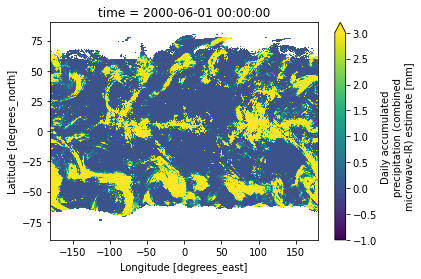

In [31]:
nc.plot(vmin=-1, vmax=3)

In [9]:
pptn = xr.DataArray(precip, coords=[lat, lon], dims=["lat", "lon"])

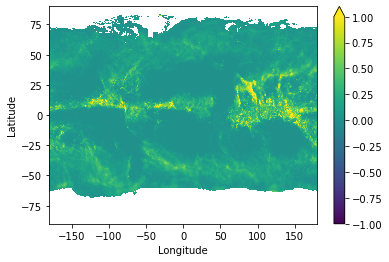

In [12]:
pptn.plot(vmin=-1, vmax=1);

In [24]:
pptn.sel(lat=slice(25, 15), lon=slice(75, 85))

<xarray.DataArray (lat: 100, lon: 100)>
array([[0.2977915 , 0.29303113, 0.31470168, ..., 0.84685725, 0.82804435,
        0.82984847],
       [0.27072603, 0.2754402 , 0.28511894, ..., 0.79037184, 0.8575732 ,
        0.8457237 ],
       [0.27188954, 0.24631438, 0.22945078, ..., 0.80107826, 0.85434586,
        0.907052  ],
       ...,
       [0.49057695, 0.43485522, 0.39682117, ..., 0.06599264, 0.06831308,
        0.06939005],
       [0.51491106, 0.47427577, 0.39861774, ..., 0.07148582, 0.07058724,
        0.06082511],
       [0.51575124, 0.49110207, 0.39128554, ..., 0.08531489, 0.08384164,
        0.06859548]], dtype=float32)
Coordinates:
  * lat      (lat) float32 24.95 24.85 24.75 24.65 ... 15.35 15.25 15.15 15.05
  * lon      (lon) float32 75.05 75.15 75.25 75.35 ... 84.65 84.75 84.85 84.95

In [22]:
#ctcz
np.nanmean(pptn.sel(lat=slice(25, 15), lon=slice(75, 85)).values)

0.3399771

In [21]:
#nino3.4
np.nanmean(pptn.sel(lat=slice(5, -5), lon=slice(-170, -120)).values)

0.019338341

### Piping

data reading pipeline to read multiple data files and supply each processed file into a generator expression. 

In [33]:
path00 = '/home/amal/dir/monthly/'

In [34]:
import os
import fnmatch

#### CTCZ

In [43]:


def gen_find_files_ct(filepatt, top): #'.HDF5, path00'
    '''
    Find all filenames in a directory tree that match a shell wildcard pattern
    '''
    for path, dirlist, filelist in os.walk(top):
        for name in fnmatch.filter(filelist, filepatt):
            yield os.path.join(path, name)

def gen_opener_ct(filenames):
    '''
    Open a sequence of filenames one at a time producing a file object.
    '''
    for filename in filenames:
        if filename.endswith('.HDF5'):
            f = h5py.File(filename,'r')                     
            pre = f['/Grid/precipitation'][:]
            
            precip = np.flip(pre[0,:,:].transpose(), axis=0)
            precip[precip==-9999.9] = np.nan
            
            pptn = xr.DataArray(precip, coords=[lat, lon], dims=["lat", "lon"])
            
            mean_ct = np.nanmean(pptn.sel(lat=slice(25, 15), lon=slice(75, 85)).values)

        yield mean_ct

        

"""
precip = np.flip(pre[0,:,:].transpose(), axis=0)
precip[precip==-9999.9] = np.nan

pptn = xr.DataArray(precip, coords=[lat, lon], dims=["lat", "lon"])
"""

'\nprecip = np.flip(pre[0,:,:].transpose(), axis=0)\nprecip[precip==-9999.9] = np.nan\n\npptn = xr.DataArray(precip, coords=[lat, lon], dims=["lat", "lon"])\n\nmean_ct = np.nanmean(pptn.sel(lat=slice(25, 15), lon=slice(75, 85)).values)\n'

In [125]:
ct = gen_find_files_ct('*.HDF5', path)
cz = gen_opener_ct(ct)

In [126]:
ctcz_mean = np.array(list(cz))

In [127]:
np.mean(ctcz_mean)

0.32370833

In [128]:
ctcz = np.array([0.3029973, 0.28903633, 0.26527745, 0.3331934, 0.29646778, 0.36056343, 0.3467886, 0.3579973, 0.3312185, 0.28859365, 0.3544129, 0.342783, 0.3399108, 0.37159163, 0.28292996, 0.31819552, 0.3547744, 0.2950891, 0.28555724, 0.35391468, 0.34406817, 0.32370833])


22

#### NINO3.4

In [162]:
def gen_find_files(filepatt, top):
    '''
    Find all filenames in a directory tree that match a shell wildcard pattern
    '''
    for path, dirlist, filelist in os.walk(top):
        for name in fnmatch.filter(filelist, filepatt):
            yield os.path.join(path, name)
            
            
def gen_opener_nino(filenames):
    '''
    Open a sequence of filenames one at a time producing a file object.
    '''
    for filename in filenames:
        if filename.endswith('.HDF5'):
            f = h5py.File(filename,'r')                     
            pre = f['/Grid/precipitation'][:]
            
            precip = np.flip(pre[0,:,:].transpose(), axis=0)
            precip[precip==-9999.9] = np.nan
            
            pptn = xr.DataArray(precip, coords=[lat, lon], dims=["lat", "lon"])
            
            mean_ni = np.nanmean(pptn.sel(lat=slice(5, -5), lon=slice(-170, -120)).values)
        
        yield mean_ni

            
        '''
def gen_concatenate(iterators):
    '''
    #Chain a sequence of iterators together into a single sequence.
    '''
    for it in (iterators):
        yield from it  #from iterator obj
'''
        
#what do you want to do with the chained files?

def list_mean_nino(iter_sq):
    lm = [i for i in iter_sq]    
    return lm


In [247]:
ni = gen_find_files('*.HDF5', path)

In [248]:
no = gen_opener_nino(ni)

In [249]:
nino_mean = np.array(list(no))

In [250]:
np.mean(nino_mean)

0.027236596

In [251]:
nino = np.array([0.03273857, 0.040293884, 0.08129967, 0.027020972, 0.047121473, 0.04746035, 0.04956097, 0.02465363, 0.045061797, 0.07757691, 0.014246375, 0.049149122, 0.072244555, 0.022767693, 0.05671134, 0.18118231, 0.016420957, 0.037494816, 0.034776427, 0.04234705, 0.016361123, 0.027236596])

len(nino)

22

### Scatter

In [257]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

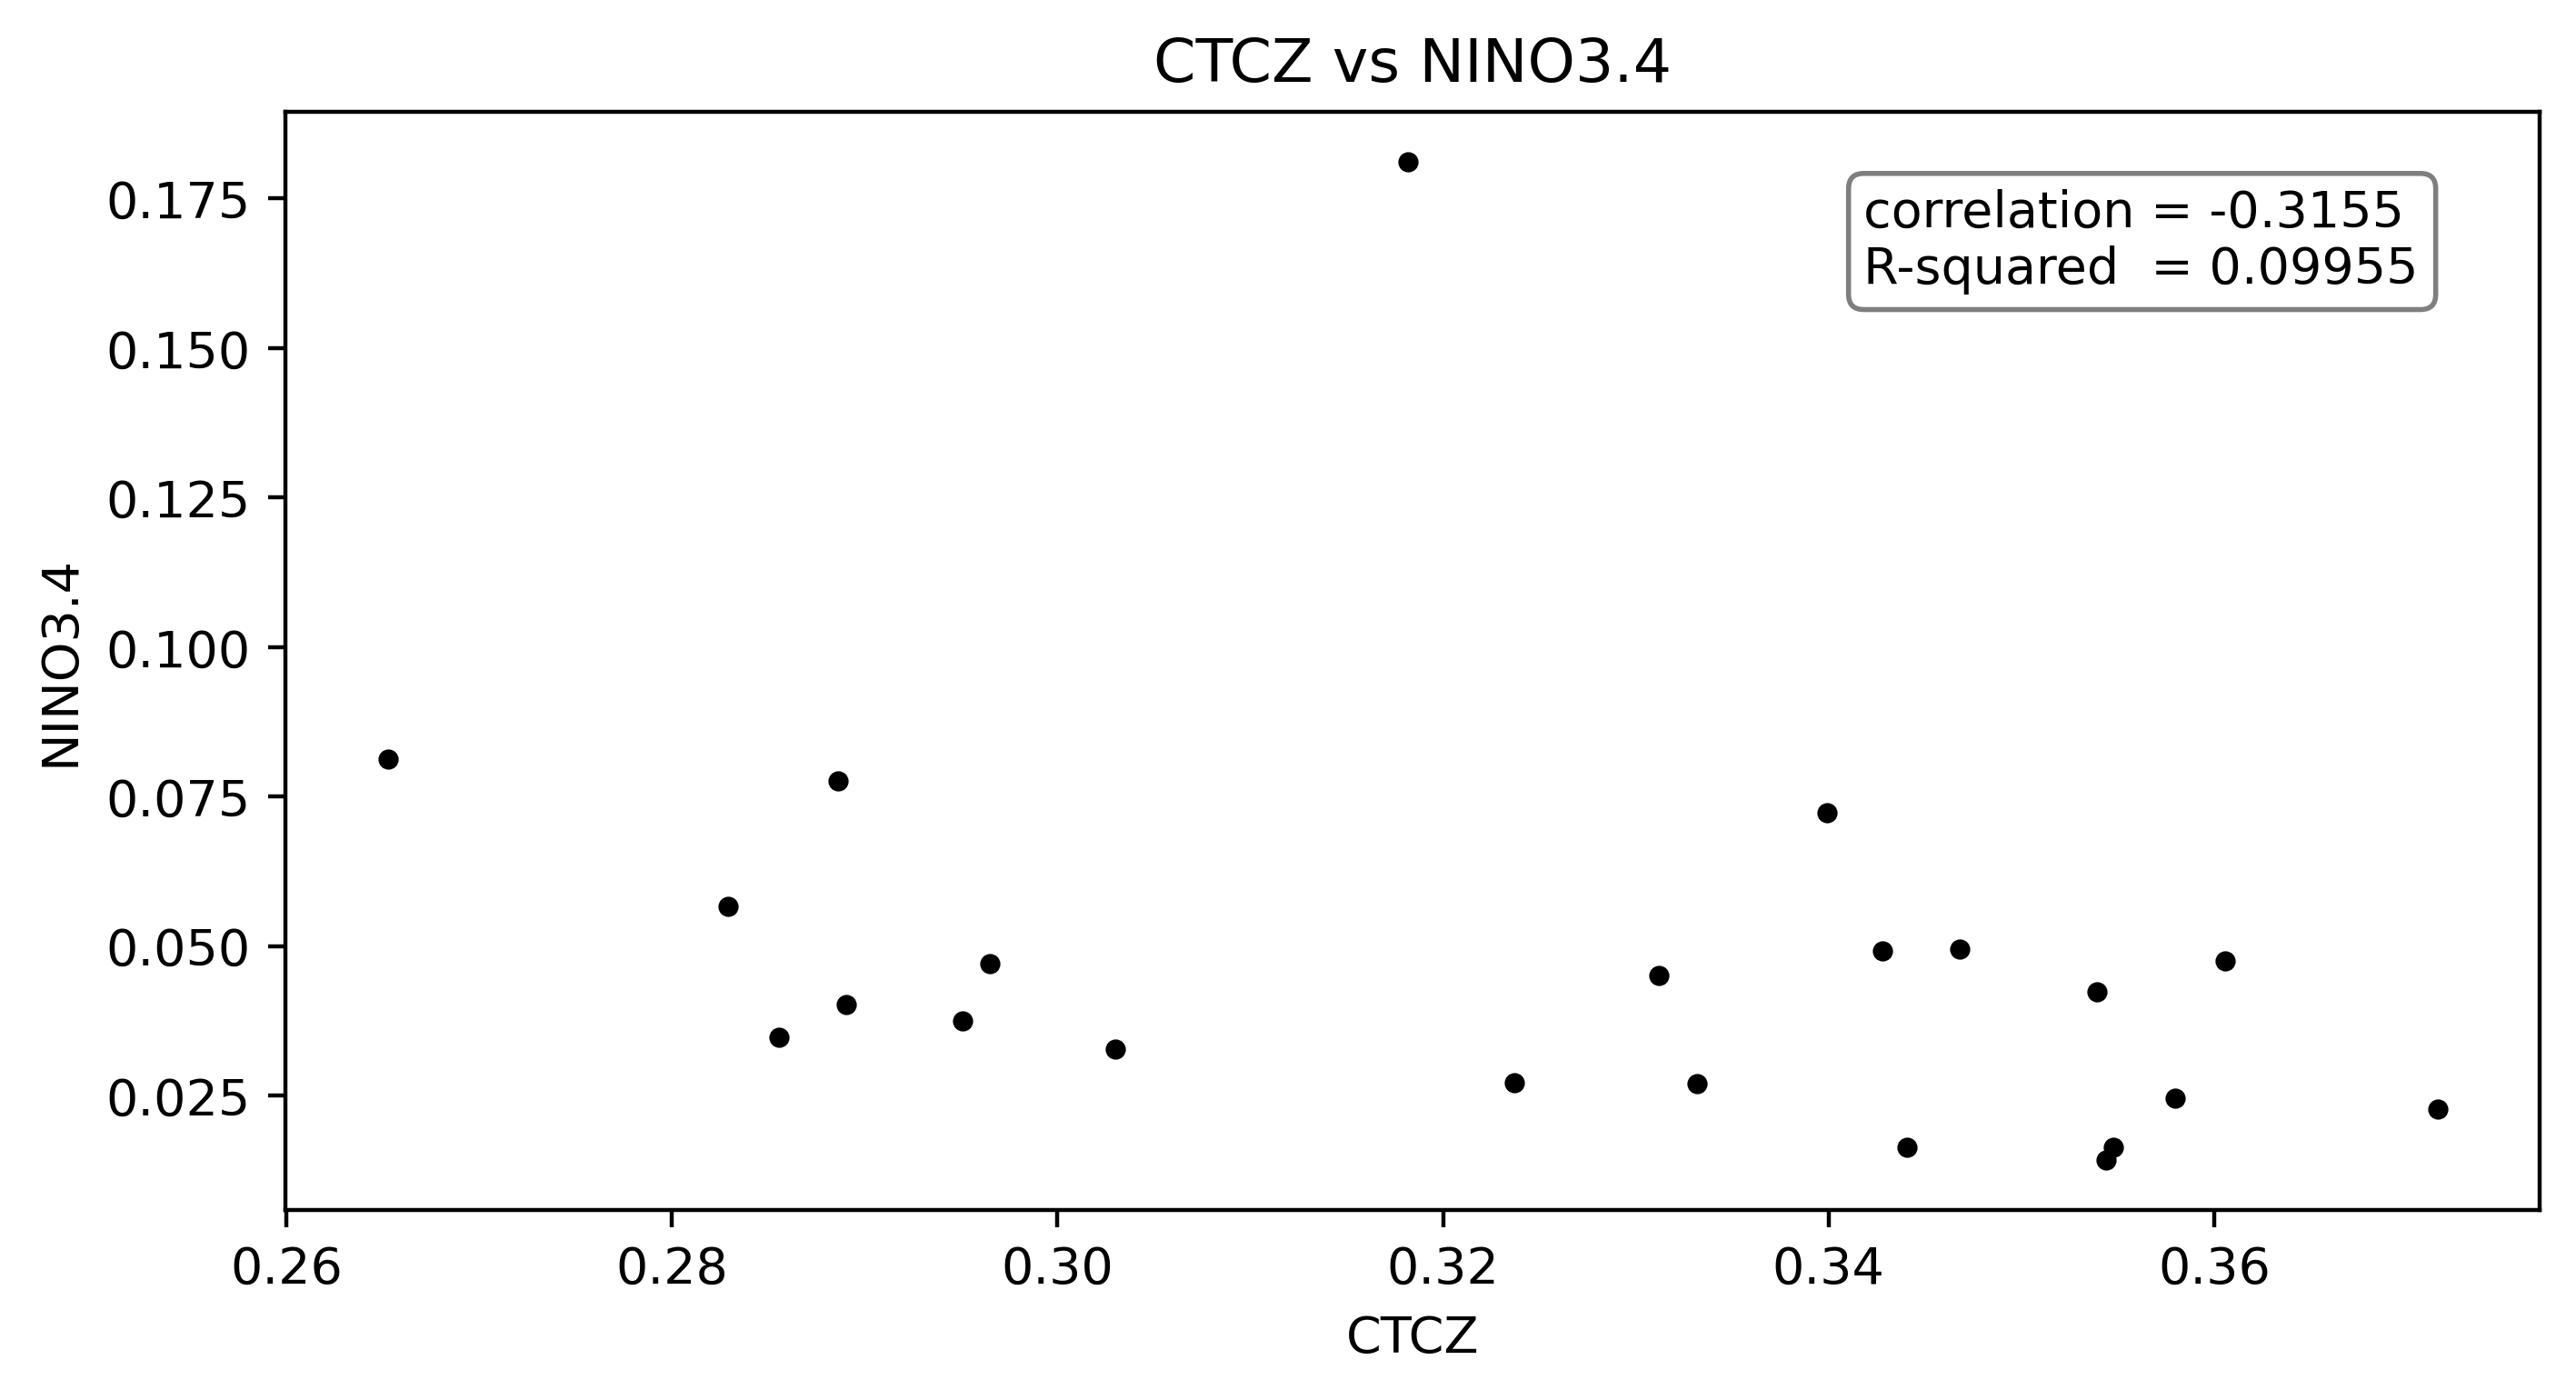

In [261]:
fig = plt.figure(dpi=400, figsize=(8,4))
ax = plt.axes()

ax.set_title('CTCZ vs NINO3.4')
ax.plot(ctcz, nino, '.', color='black' )

ax.set_xlabel('CTCZ')
ax.set_ylabel('NINO3.4')

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

ax.text(0.70, 0.93, 'correlation = -0.3155 \nR-squared  = 0.09955', transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

;

plt.savefig('/home/amal/dir/scatter/n/ctcz_vs_nino_monthly.jpg', dpi=400, bbox_inches='tight')
#plt.savefig('ctcz_vs_wpac.jpg', dpi=400, bbox_inches='tight')

In [255]:
from scipy import stats

In [253]:
np.corrcoef(ctcz, nino)

array([[ 1.       , -0.3155256],
       [-0.3155256,  1.       ]])

In [256]:
stats.pearsonr(ctcz, nino)

(-0.3155255980728481, 0.1526016721053098)

In [259]:
res = stats.linregress(ctcz, nino)
res.rvalue**2

0.09955640303922844